ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       (11.52756287557101+0j)
1       (11.52756287557101+0j)
2       (11.52756287557101+0j)
3       (11.52756287557101+0j)
4       (11.52756287557101+0j)
                 ...          
2992    (11.52756287557101+0j)
2993    (11.52756287557101+0j)
2994    (11.52756287557101+0j)
2995    (11.52756287557101+0j)
2996    (11.52756287557101+0j)
Name: velocity, Length: 2997, dtype: object

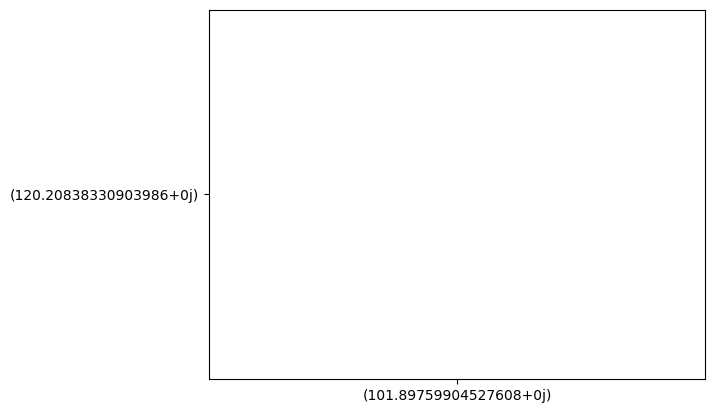

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv("endurance_michigan_2019-easy_driver.csv")
plt.scatter(x=df2["x"],y=df2["y"], c=df2["velocity"], cmap="viridis")
plt.title("LETS FUCKING GO")
plt.colorbar()
# sns.set_style("whitegrid")
# pal = sns.color_palette("Reds", as_cmap=True)
# sns.relplot(data=df, x="x", y="y", hue="vel", palette="RdYlBu") #, palette="dark:viridis") #, palette="viridis") # kind="line")
#print("TIME IN SECONDS 1 g-g diagram",df2.loc[df2.shape[0]-1, "time"])

In [ ]:
plt.scatter(df["time"], df["power_in"])
energy = sum(df["delta_t"] * df["power_in"])
print(energy * 2.7778e-7)

plt.scatter(df2["time"], df2["power_in"])
energy = sum(df2["delta_t"] * df2["power_in"])
print(energy * 2.7778e-7 * 11)

rms_battery_current = (sum([(x/400)**2 for x in df["power_in"]])/df.shape[0])**0.5
print(rms_battery_current)

rms_battery_current = (sum([(x/400)**2 for x in df2["power_in"]])/df2.shape[0])**0.5
print(rms_battery_current)

In [ ]:
plt.scatter(df["time"], df["motor_torque"])

In [ ]:
plt.scatter(df2["R"], df2["vel"])
plt.ylim([-10,5])
plt.xlim([0,10])

In [ ]:
plt.scatter(df2["time"], df2["ay"], label = "AY")
plt.scatter(df2["time"], df2["ax"], label = "AX")
plt.legend()

In [ ]:
df = pd.read_csv("autocross_michigan_2019-easy_driver.csv")
plt.scatter(x=df["x"],y=df["y"], c=df["vel"]/70, cmap="viridis")
print("TIME IN SECONDS 1 g-g diagram",df.loc[df.shape[0]-1, "time"])

In [ ]:
plt.scatter(df["pos"], df["delta_t"])
plt.plot(df["pos"], df["time"])
current_df = df[df["delta_t"] > 100]
print(current_df)
# plt.scatter(current_df["pos"], current_df["delta_t"])

In [ ]:
df = pd.read_csv("autocross_michigan_2019-easy_driver.csv")
df3 = df[df["R"] < 50]
plt.scatter(x=df3["x"],y=df3["y"], c=df3["R"], cmap="viridis", s= 10)
df3 = df[df["R"] > 50]
plt.scatter(x=df3["x"],y=df3["y"], c='y', s= 10)
df3 = df[df["R"] < 7]
plt.scatter(x=df3["x"],y=df3["y"], c='r', s= 10)
#print("TIME IN SECONDS 1 g-g diagram",df.loc[df.shape[0]-1, "time"])

In [ ]:
plt.scatter(df["ax"], df["ay"])
plt.grid()

In [ ]:
plt.plot(df2["time"], df2["vel"])

In [ ]:
plt.scatter(df2["ax"],df2["ay"])

In [ ]:
plt.scatter(df["vel"],df["R"])

In [ ]:
import sys
sys.path.append("..")
import engine
from engine import racecar
import engine.magic_moment_method.vehicle_params as vehicles
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


easy_driver = engine.Racecar(vehicles.Concept2023(), "../engine/magic_moment_method/analysis/GGV.csv")

endurance_track = engine.Track("../racing_lines/" + "endurance_michigan_2019" + "-racing_line.csv", 1681.963)
endurance_event = engine.Simulation(easy_driver, endurance_track)
endurance_results, time = endurance_event.run()
reverse_sim = endurance_event.reverse_sim


In [ ]:
# 634.8268839118932
new = reverse_sim.applymap(np.real)
plt.plot(new["pos"], new["vel"])
plt.scatter(new["pos"], new["R"], c='r')
plt.grid()
plt.ylim([0,40])
plt.show()
print(time)

In [ ]:
# 634.8268839118932
new = reverse_sim.applymap(np.real)
plt.plot(new["delta_t"], new["vel"])
plt.scatter(new["delta_t"], new["R"], c='r')
plt.grid()
plt.ylim([0,40])
plt.show()
print(time)

In [ ]:
plt.scatter(new["R"], new["vel"])
plt.ylim([0,3])
plt.xlim([0,5])
plt.ylabel("Velocity")
plt.xlabel("Turn Radius")

In [ ]:
new["R"].sort_values().iloc[:100]


In [ ]:
from matplotlib.pyplot import title


endurance_results1 = endurance_event.results.applymap(np.real)
plt.scatter(x=endurance_results1["x"],y=endurance_results1["y"], c=endurance_results1["vel"], cmap="viridis")
plt.title("2019 Michigan Endurance Track")

In [ ]:
fig = plt.figure(figsize=(20, 20), dpi=90)
# df = pd.read_csv("../racing_lines/en_mi_2019.csv")
# #df2 = pd.read_csv("../tracks/Endurance_Michigan_2019_CONES_ONLY.csv")
# df2 = pd.read_csv("../tracks/Endurance_Michigan_2019_Sanitized.csv")

df = pd.read_csv("../racing_lines/ax_mi_2019.csv")
#df2 = pd.read_csv("../tracks/Endurance_Michigan_2019_CONES_ONLY.csv")
df2 = pd.read_csv("../tracks/Autocross_Michigan_2019_Sanitized.csv")


plt.plot(df["x"] / 0.3048, df["y"] / 0.3048)
# df2["x"] += 61.71
# df2["y"] += 20.92
#print(sum(endurance_results1["dist"]))
plt.scatter(df2["out_x"], df2["out_y"])
plt.scatter(df2["in_x"], df2["in_y"])